In [16]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.decomposition import PCA
from IPython.core.pylabtools import figsize

%matplotlib inline
figsize(16, 8)

# Load and adjust the data

In [17]:
df_train = pd.read_csv('../data/TableS2_training.csv', keep_default_na=False)

df_train['RRF_Measured'] = df_train['RRF_Measured'] * 1e-2
df_train['RRF_Predicted'] = df_train['RRF_Predicted'] * 1e-2

df_train.head()

,Name,Annotation,Short Name,InChI,MH+ Fragment,MH+ Isotope,fragment/isotope,MV,logD,abs_mob,zeff,RRF_Measured,RRF_Predicted
0,L-Alanine,a,Ala,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5...",90,,,70.3,-2.79,3.140000,0.764,0.000595,-0.013600
1,β-Alanine,a,β-Ala,"InChI=1S/C3H7NO2/c4-2-1-3(5)6/h1-2,4H2,(H,5,6)",90,,,70.4,-3.01,4.140000,0.995,0.000503,-0.012700
2,γ-Aminobutyric acid,a,GABA,"InChI=1S/C4H9NO2/c5-3-1-2-4(6)7/h1-3,5H2,(H,6,7)",104,,,89.2,-3.10,0.000409,1.000,0.000903,-0.004760
3,Histamine,,HisN,"InChI=1S/C5H9N3/c6-2-1-5-3-7-4-8-5/h3-4H,1-2,6...",112,,,98.5,-2.31,0.000736,2.000,0.001110,0.006150
4,Creatine,a,Crea,"InChI=1S/C4H9N3O2/c1-7(4(5)6)2-3(8)9/h2H2,1H3,...",114,,,88.3,-1.76,0.000449,1.000,0.002290,-0.000944


# Data preparation
- Exclude certain metabolites
- Select training and testing data

In [18]:
# Training Data
X_train = df_train[['MV', 'logD', 'abs_mob']]
X_train = X_train[df_train['Annotation'] == '']

y_train = df_train[['RRF_Measured']]
y_train = y_train[df_train['Annotation'] == '']

# Testing Data (it seems same data is used for training and validation) :/
X_test = X_train
y_test = y_train

print("Number of metabolites:", len(X_train))

Number of metabolites: 36


# Fit liner model on the data from Table S2

In [19]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# The coefficients
print('Coefficients:', regr.coef_[0])
print('Intercept:', regr.intercept_)

# Coeffeicients and intercept from the paper
paper_coef = [4.40e-4, 2.7e-3, 14]
paper_intercept = -4.14e-2

print("DIFFERENCE")
print("Coef. Diff.", np.array(regr.coef_[0]) - np.array(paper_coef))
print("Intercept Diff.", regr.intercept_[0] - paper_intercept)

Coefficients: [  4.39456215e-04   2.72001632e-03   1.41408522e+01]
Intercept: [-0.0413185]
DIFFERENCE
Coef. Diff. [ -5.43785468e-07   2.00163181e-05   1.40852219e-01]
Intercept Diff. 8.1503911411e-05


NOTE: Our model seems to be is very close to the model reported in the paper

# Make predictions

We are making predictions on the same data we used for training, which doesn't seem correct

In [21]:
predictions = Series(np.ravel(regr.predict(X_test)), index=X_train.index, name='Predictions')

In [22]:
predictions.head()

3    0.006092
5    0.002728
7    0.007550
8    0.005441
9    0.012561
Name: Predictions, dtype: float64

In [23]:
data = df_train[df_train['Annotation'] == '']
predictions.index = data.index

data = pd.concat([data, predictions], axis=1)

data['Diff'] = np.abs(data['Predictions'] - data['RRF_Predicted'])

data[['Name', 'RRF_Measured', 'RRF_Predicted', 'Predictions', 'Diff']]

,Name,RRF_Measured,RRF_Predicted,Predictions,Diff
3,Histamine,0.00111,0.00615,0.006092,5.762942e-05
5,L-Valine,0.00188,0.00263,0.002728,9.795905e-05
7,Nicotinamide,0.00322,0.00755,0.007550,9.754237e-08
8,Nicotinic acid,0.00250,0.00543,0.005441,1.095089e-05
9,L-Leucine,0.01610,0.01250,0.012561,6.072191e-05
10,L-Isoleucine,0.01570,0.01250,0.012483,1.662497e-05
13,Adenine,0.00766,0.00332,0.003309,1.135689e-05
14,L-Homocysteine,0.00168,0.00116,0.001184,2.426493e-05
15,p-Benzoic acid,0.00718,0.00962,0.009627,7.348617e-06
16,Tyramine,0.01270,0.01110,0.011067,3.307618e-05


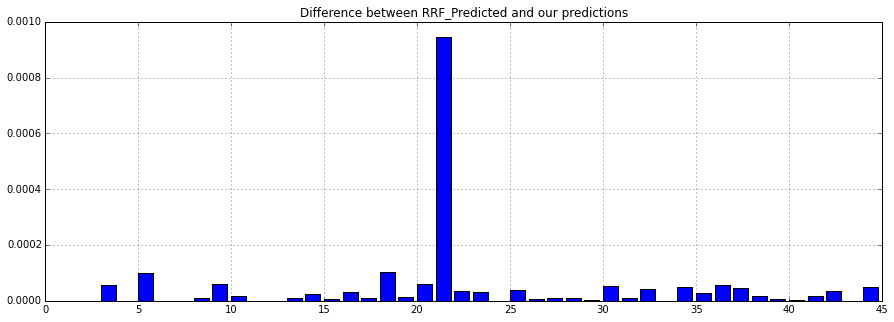

In [24]:
figsize(15, 5)
plt.bar(data.index, data['Diff'])
plt.grid(True)
plt.title('Difference between RRF_Predicted and our predictions')
plt.show()

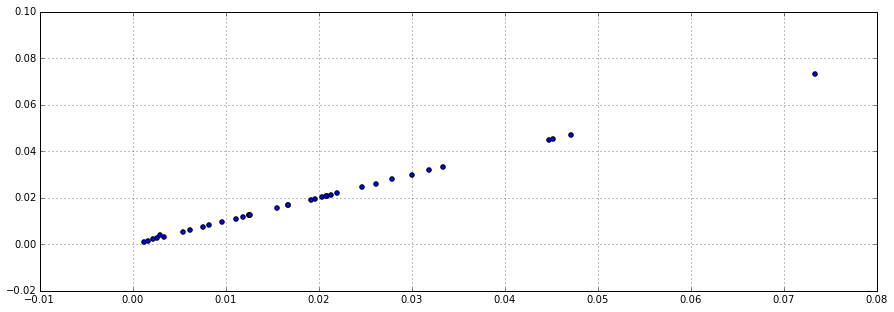

In [25]:
plt.scatter(data['RRF_Predicted'], data['Predictions'])
plt.grid()
plt.show()

**The results we get are very close to the reported results, which suggests that the authors used the same data for training and validation of the model**

# Comparison of model metrics

In [26]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_true = data['RRF_Measured']
y_pred = data['RRF_Predicted']
y_pred_new = data['Predictions']

## Metrics of the model reported in the paper

In [27]:
print("explained_variance", explained_variance_score(y_true, y_pred))
print("mean_absolute_error", mean_absolute_error(y_true, y_pred))
print("r2_score", r2_score(y_true, y_pred))

explained_variance 0.828348380635
mean_absolute_error 0.00532638888889
r2_score 0.828341767487


## Metrics of our model

In [28]:
print("explained_variance", explained_variance_score(y_true, y_pred_new))
print("mean_absolute_error", mean_absolute_error(y_true, y_pred_new))
print("r2_score", r2_score(y_true, y_pred_new))

explained_variance 0.827874596497
mean_absolute_error 0.00535788018367
r2_score 0.827874596497


# Let's try with the other data

In [29]:
df_T1_pred = pd.read_csv('../data/Table1_predictions.csv', keep_default_na=False)

df_T1_pred['RRF_Predicted'] = df_T1_pred['RRF_Predicted'] * 1e-2

In [30]:
df_T1_pred.head()

,Short Name,MV,logD,abs_mob,RRF_Predicted
0,Leu,124,-1.52,0.000249,0.01250
1,PABA,102,0.80,0.000279,0.00962
2,TryN,120,-2.00,0.000360,0.01110
3,Lys,131,-3.05,0.000541,0.01550
4,C0,155,-2.49,0.000323,0.02460


In [31]:
X2_pred = df_T1_pred[['MV', 'logD', 'abs_mob']]

# Making predictions on Table 1 Data using the model trained on Table S2

In [32]:
predictions2 = Series(np.ravel(regr.predict(X2_pred)), name='Predictions')

In [33]:
data2 = pd.concat([df_T1_pred, predictions2], axis=1)

data2['Diff'] = np.abs(data2['Predictions'] - data2['RRF_Predicted'])

data2[['Short Name', 'RRF_Predicted', 'Predictions', 'Diff']]

,Short Name,RRF_Predicted,Predictions,Diff
0,Leu,0.01250,0.012561,0.000061
1,PABA,0.00962,0.009627,0.000007
2,TryN,0.01110,0.011067,0.000033
3,Lys,0.01550,0.015604,0.000104
4,C0,0.02460,0.024592,0.000008
5,Sero,0.02200,0.022004,0.000004
6,Cyst,0.02610,0.026107,0.000007
7,NTyr,0.03000,0.029996,0.000004
8,At,0.07300,0.073318,0.000318
9,A,0.04520,0.045163,0.000037


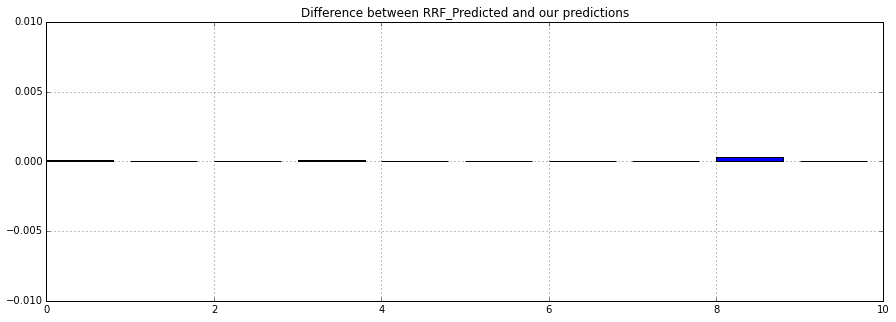

In [34]:
figsize(15, 5)
plt.bar(data2.index, data2['Diff'])
plt.ylim([-0.01, 0.01])
plt.grid(True)
plt.title('Difference between RRF_Predicted and our predictions')
plt.show()

# Making predictions on Table S3 using the model trained on Table S2

In [35]:
df_TS3 = pd.read_csv('../data/TableS3_training.csv', keep_default_na=False)

df_TS3['RRF_Measured'] = df_TS3['RRF_Measured'] * 1e-2
df_TS3['RRF_Predicted'] = df_TS3['RRF_Predicted'] * 1e-2

df_TS3

,Name,Short Name,InChI,MH+,MV,logD,abs_mob,zeff,RRF_Measured,RRF_Predicted
0,L-Ornithine,Orn,"InChI=1S/C5H12N2O2/c6-3-1-2-4(7)5(8)9/h4H,1-3,...",133,113,-4.22,0.000686,1.82,0.00281,0.00631
1,N-Methyl-Aspartic acid,MeAsp,"InChI=1S/C5H9NO4/c1-6-3(5(9)10)2-4(7)8/h3,6H,2...",148,114,-2.58,0.000348,0.71,0.00842,0.00667
2,3-Methyl-L-Histidine,MeHis,InChI=1S/C7H11N3O2/c1-10-4-9-3-5(10)2-6(8)7(11...,170,144,-2.94,0.000620,1.49,0.01400,0.02280
3,L-Theanine,Thea,InChI=1S/C7H14N2O3/c1-2-9-6(10)4-3-5(8)7(11)12...,175,150,-2.56,0.000304,0.73,0.02320,0.02190
4,L-Citrulline,Cit,InChI=1S/C6H13N3O3/c7-4(5(10)11)2-1-3-9-6(8)12...,176,140,-3.19,0.000314,0.83,0.01160,0.01600
5,O-Propionyl-L-Carnitine,C3,InChI=1S/C10H19NO4/c1-5-10(14)15-8(6-9(12)13)7...,218,214,-1.92,0.000256,1.00,0.05230,0.05740
6,L-Carnosine,Carn,InChI=1S/C9H14N4O3/c10-2-1-8(14)13-7(9(15)16)3...,227,182,-2.89,0.000550,1.92,0.01910,0.03030
7,O-Butyryl-L-Carnitine,C4,InChI=1S/C11H21NO4/c1-5-6-11(15)16-9(7-10(13)1...,232,234,-1.73,0.000246,1.00,0.06660,0.06030
8,1-Methyl-Adenosine,MeA,InChI=1S/C11H15N5O4/c1-15-3-14-10-6(9(15)12)13...,286,228,-1.82,0.000248,1.00,0.05240,0.05110
9,O-Octoyl-L-Carnitine,C8,InChI=1S/C15H29NO4/c1-5-6-7-8-9-10-15(19)20-13...,288,313,-0.64,0.000214,1.00,0.07780,0.09750


In [36]:
X_TS3 = df_TS3[['MV', 'logD', 'abs_mob']]

In [37]:
predictions3 = Series(np.ravel(regr.predict(X_TS3)), name='Predictions')

In [38]:
data3 = pd.concat([df_TS3, predictions3], axis=1)

data3['Diff'] = (data3['Predictions'] - data3['RRF_Predicted'])

data3[['Short Name', 'RRF_Measured' ,'RRF_Predicted', 'Predictions', 'Diff']]

,Short Name,RRF_Measured,RRF_Predicted,Predictions,Diff
0,Orn,0.00281,0.00631,0.006562,0.000252
1,MeAsp,0.00842,0.00667,0.006683,0.000013
2,MeHis,0.01400,0.02280,0.022734,-0.000066
3,Thea,0.02320,0.02190,0.021936,0.000036
4,Cit,0.01160,0.01600,0.015969,-0.000031
5,C3,0.05230,0.05740,0.051123,-0.006277
6,Carn,0.01910,0.03030,0.038579,0.008279
7,C4,0.06660,0.06030,0.060287,-0.000013
8,MeA,0.05240,0.05110,0.057434,0.006334
9,C8,0.07780,0.09750,0.097517,0.000017


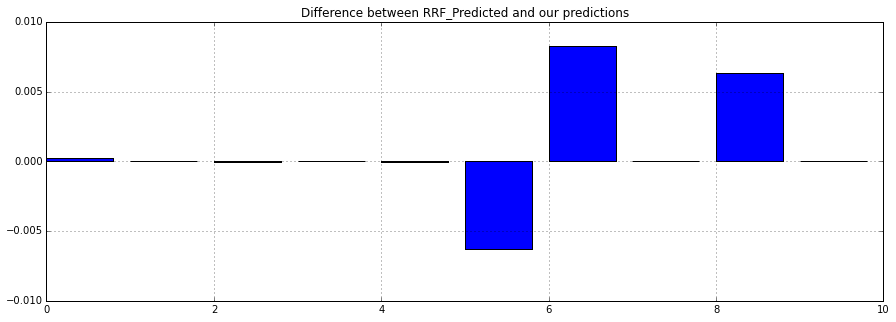

In [39]:
figsize(15, 5)
plt.bar(data3.index, data3['Diff'])
plt.grid(True)
plt.ylim([-0.01, 0.01])
plt.title('Difference between RRF_Predicted and our predictions')
plt.show()

# This doesn't look right...
# Let's try exactly with their model

In [40]:
paper_model = np.array([4.40e-4, 2.7e-3, 14, -4.14e-2])

# Making predictions on Table S3 using the model from the paper

In [41]:
predictions3 = Series(np.dot(paper_model, np.column_stack((X_TS3, np.ones(len(X_TS3)))).T), name='Predictions')

data3 = pd.concat([df_TS3, predictions3], axis=1)

data3['Diff'] = (data3['Predictions'] - data3['RRF_Predicted'])

data3[['Short Name', 'RRF_Measured' ,'RRF_Predicted', 'Predictions', 'Diff']]

,Short Name,RRF_Measured,RRF_Predicted,Predictions,Diff
0,Orn,0.00281,0.00631,0.006530,0.000220
1,MeAsp,0.00842,0.00667,0.006666,-0.000004
2,MeHis,0.01400,0.02280,0.022702,-0.000098
3,Thea,0.02320,0.02190,0.021944,0.000044
4,Cit,0.01160,0.01600,0.015983,-0.000017
5,C3,0.05230,0.05740,0.051160,-0.006240
6,Carn,0.01910,0.03030,0.038577,0.008277
7,C4,0.06660,0.06030,0.060333,0.000033
8,MeA,0.05240,0.05110,0.057478,0.006378
9,C8,0.07780,0.09750,0.097588,0.000088


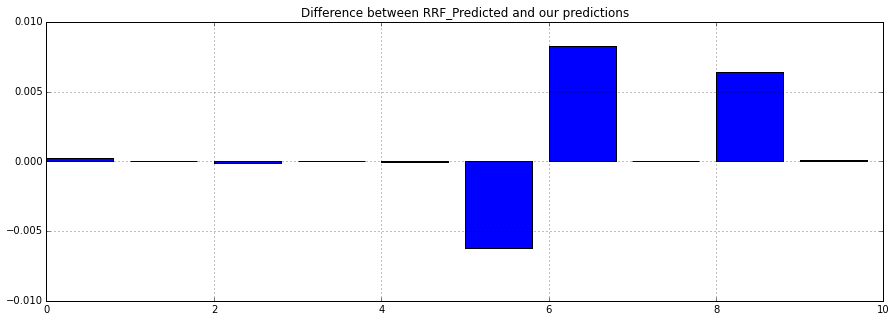

In [42]:
figsize(15, 5)
plt.bar(data3.index, data3['Diff'])
plt.ylim([-0.01, 0.01])
plt.grid(True)
plt.title('Difference between RRF_Predicted and our predictions')
plt.show()

**Even the model from the paper doesn't produce the exact same results**

**Probably the data reported in the supporting materials is rounded...**